In [ ]:
# 0,0에는 서울의 9월달 최고체감온도 라인 그래프
# 0,1 최고체감온도가 30도 이상인 날의 라인 그래프
# 1,0 에는 최고체감온도가 30도 이상인 날의 평균기온의 막대그래프
# 1,1 에는 최고체감온도가 30도 이상인날의 최고기온, 평균기온, 최저기온 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
matplotlib.rcParams['font.family'] = 'appleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv(r'./data/ISSUE_HW_DAY_2023-09_2023-09_2023.csv')
df
# df.columns

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2023-09-01,북강릉(104),X,28.0,28.2,23.0,17.5,71.1,X,,X,낮음
1,2023-09-01,동해(106),X,27.5,27.0,22.5,18.8,82.4,X,,X,낮음
2,2023-09-01,서울(108),X,29.1,29.6,24.5,19.7,70.6,X,,X,높음
3,2023-09-01,인천(112),X,28.3,28.3,24.1,20.4,73.0,X,,X,높음
4,2023-09-01,원주(114),X,28.4,29.1,22.7,17.9,74.0,X,,X,낮음
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2023-09-30,북춘천(93),X,23.8,22.9,16.9,13.1,89.5,X,,X,낮음
4856,2023-09-30,하동(932),X,25.2,24.4,19.8,16.7,84.0,X,,X,낮음
4857,2023-09-30,철원(95),X,23.2,22.0,16.4,12.0,89.1,X,,X,낮음
4858,2023-09-30,동두천(98),X,23.9,22.2,17.9,14.3,85.4,X,,X,낮음


Text(0.5, 0.98, '9월의 온도')

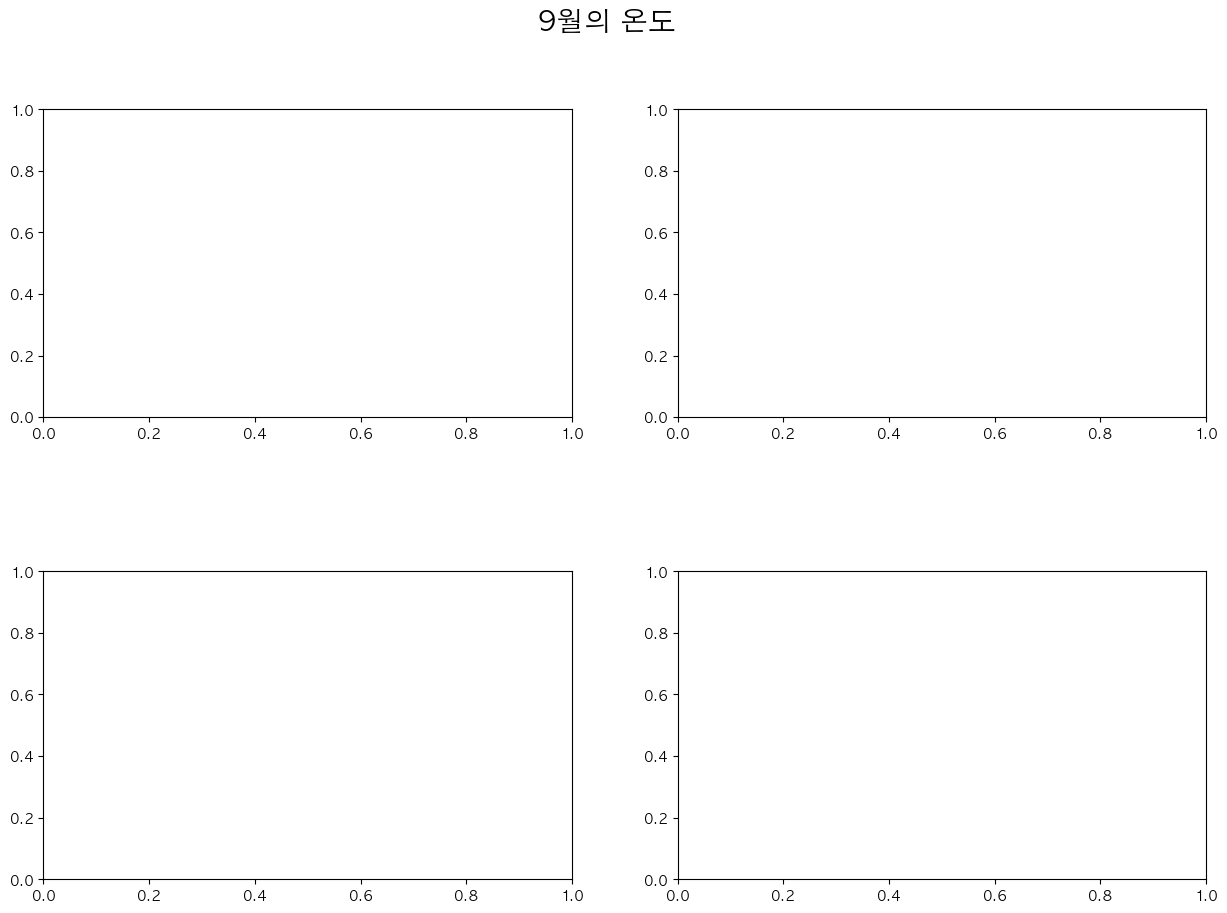

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # You can adjust the value as needed
fig.suptitle('9월의 온도', fontsize=20)

/var/folders/qr/d0tz05096cq7wtbf54br3qsw0000gn/T/ipykernel_88299/1271072110.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(df1['일시'], rotation = 45, fontsize=8)


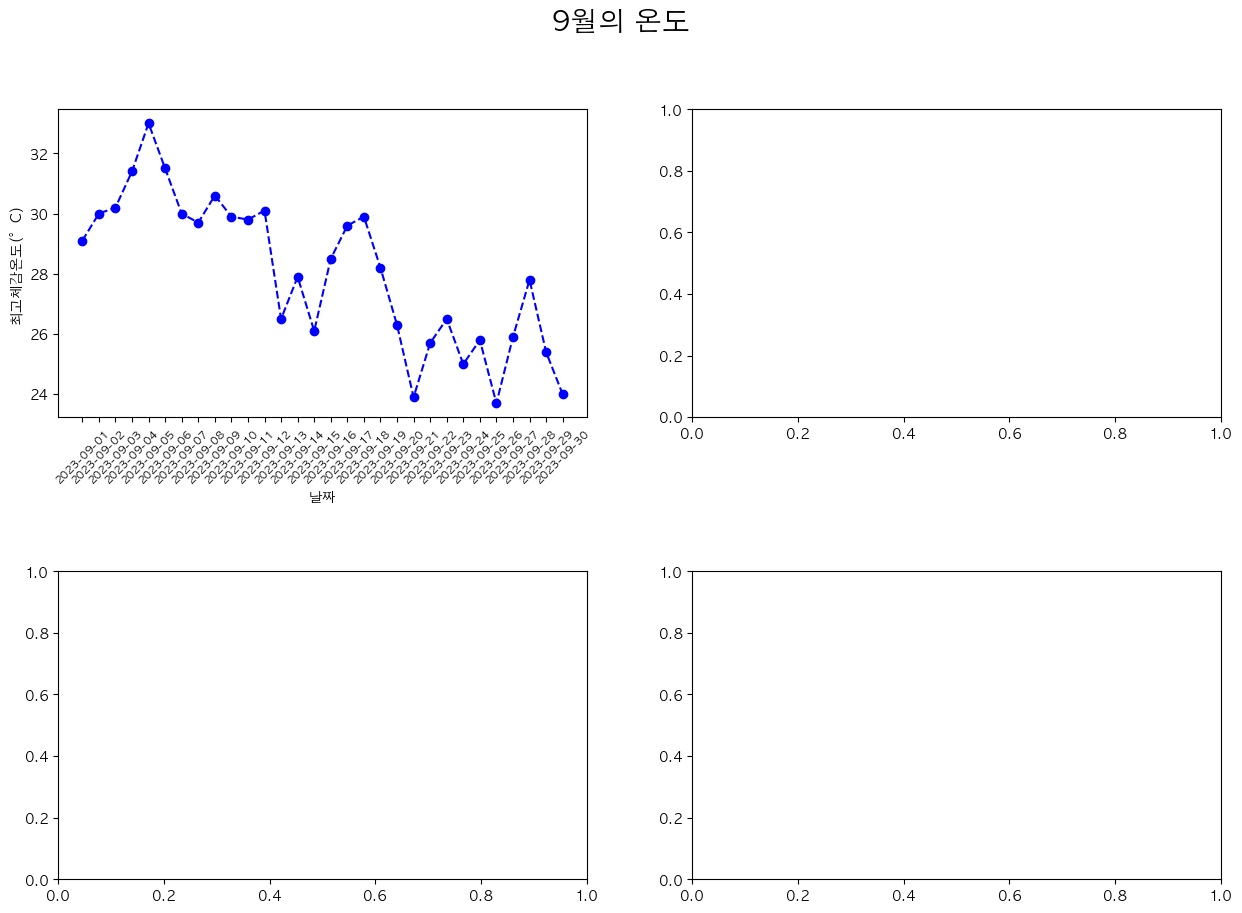

In [6]:
axs[0,0].clear()
df1 = df.query("지점 == '서울(108)'")
df1
axs[0,0].plot(df1['일시'], df1['최고체감온도(°C)'], label='최고체감온도(°C)', marker='o', linestyle='dashed', color='blue')
axs[0,0].set_xticklabels(df1['일시'], rotation = 45, fontsize=8)
axs[0,0].set(xlabel='날짜', ylabel='최고체감온도(°C)')
fig

/var/folders/qr/d0tz05096cq7wtbf54br3qsw0000gn/T/ipykernel_88299/4157841565.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(df2['일시'], rotation = 45, fontsize=8)


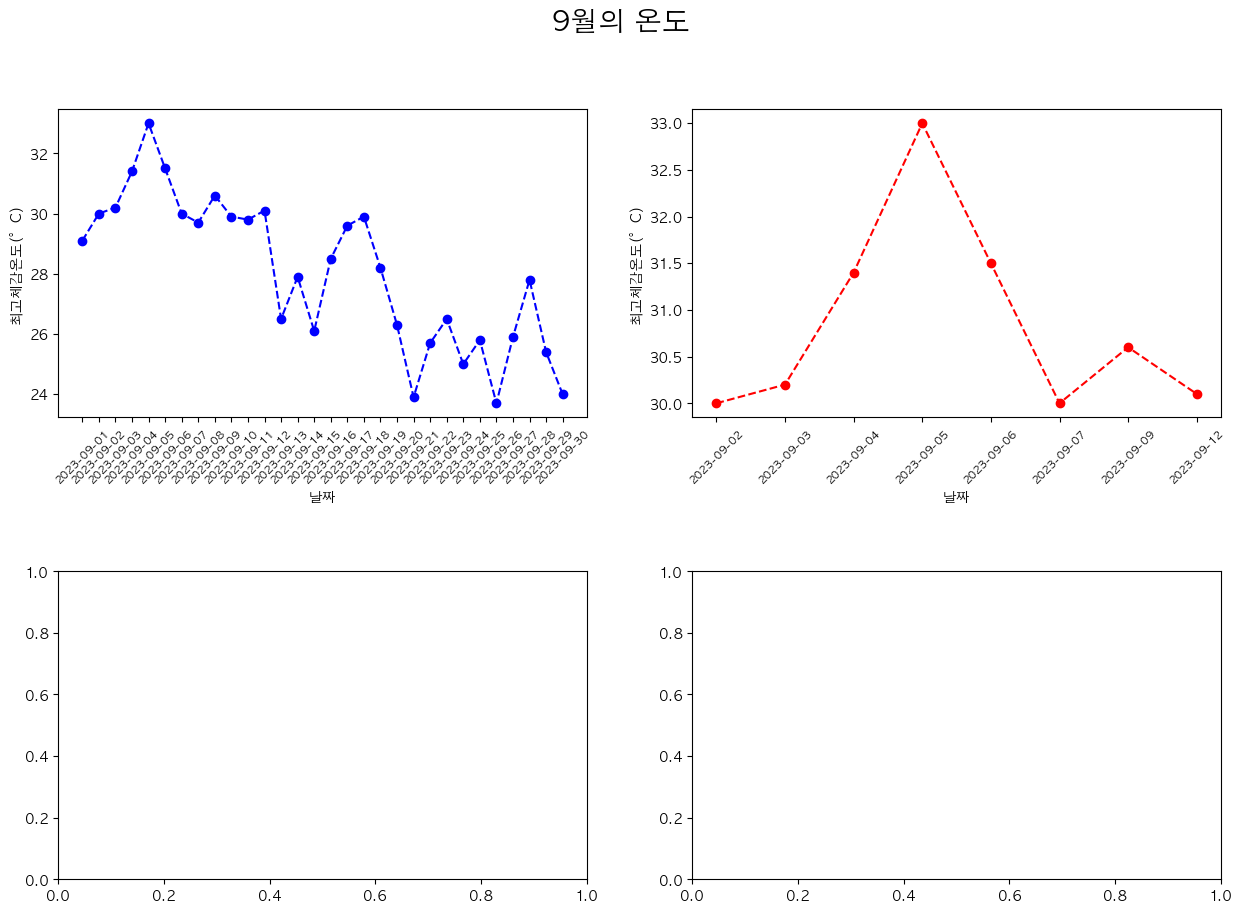

In [7]:
axs[0,1].clear()
df2 = df[(df['최고체감온도(°C)'] >= 30) & (df['지점'] == '서울(108)')]
df2
axs[0,1].plot(df2['일시'], df2['최고체감온도(°C)'], label='최고체감온도(°C)', marker='o', linestyle='dashed', color='red')
axs[0,1].set(xlabel='날짜', ylabel='최고체감온도(°C)')
axs[0,1].set_xticklabels(df2['일시'], rotation = 45, fontsize=8)
fig

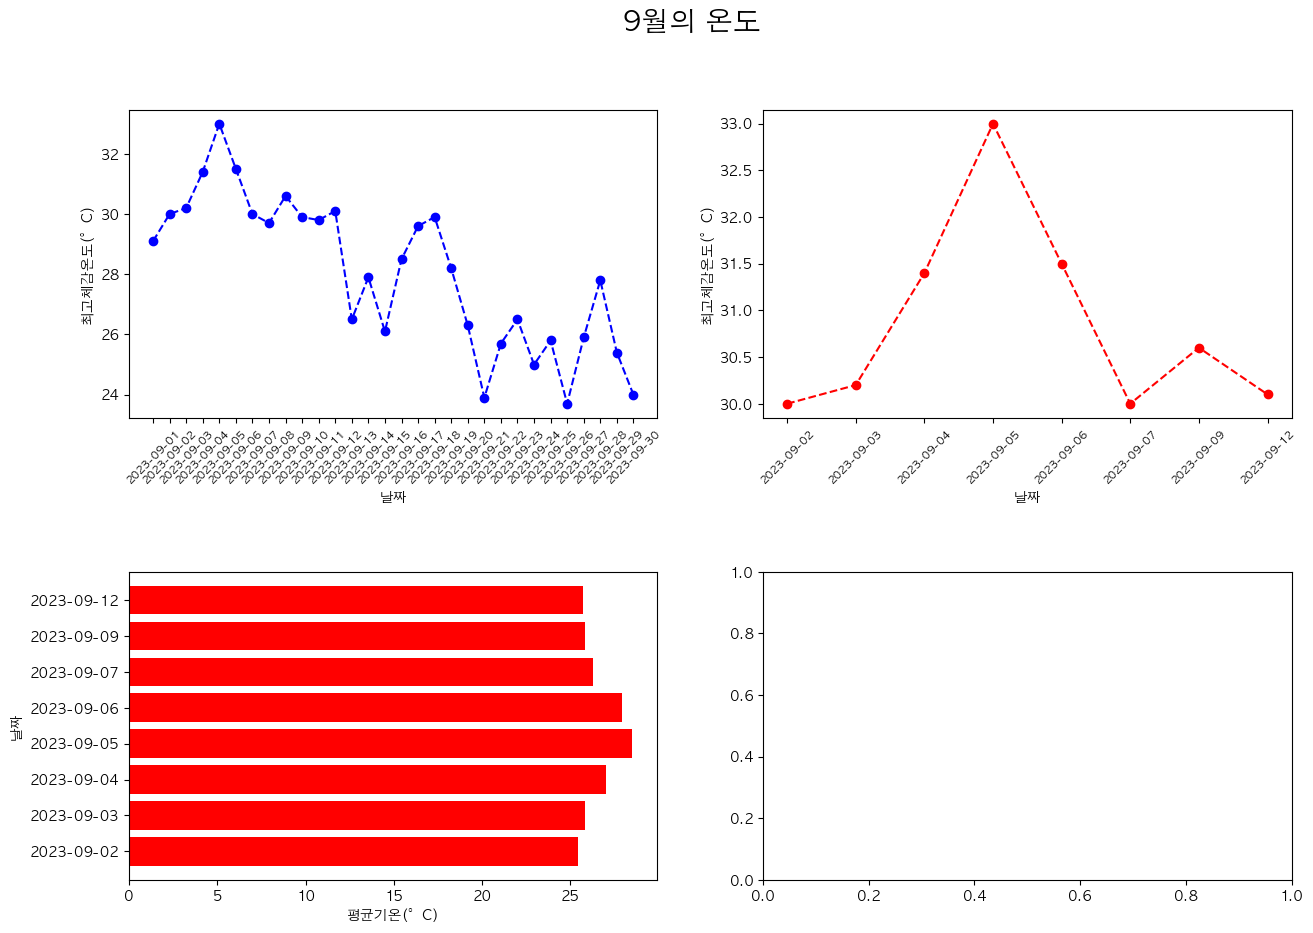

In [8]:
axs[1,0].clear()
axs[1,0].barh(df2['일시'], df2['평균기온(°C)'], label='평균기온(°C)', color='red')
axs[1,0].set(ylabel='날짜', xlabel='평균기온(°C)')
fig

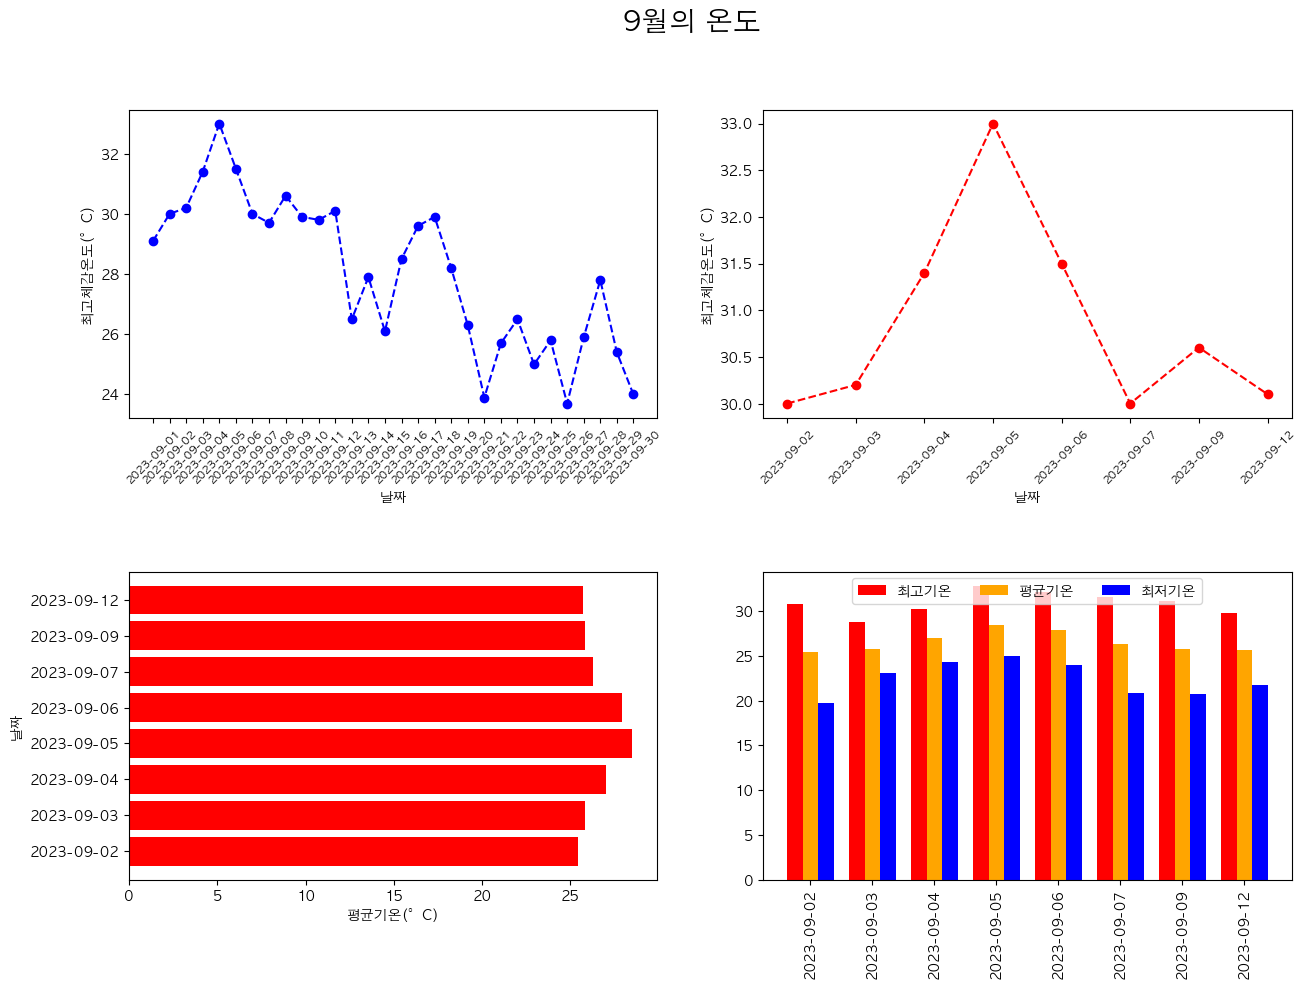

In [9]:
axs[1,1].clear()
w = 0.25
idx = np.arange(len(df2['일시']))
axs[1,1].bar(idx-w, df2['최고기온(°C)'], label='최고기온', width=w, color='red')
axs[1,1].bar(idx, df2['평균기온(°C)'], label='평균기온', width=w, color='orange')
axs[1,1].bar(idx+w, df2['최저기온(°C)'], label='최저기온', width=w, color='blue')
axs[1,1].set_xticks(idx)
axs[1,1].set_xticklabels(df2['일시'], rotation=90)
axs[1,1].legend(loc='upper center', ncols=3)
fig

In [10]:
fig.savefig('./result/김태훈_9월_온도_시각화.png')